# Muhammad Aysh MLDP
## IBM Employee Attrition Model

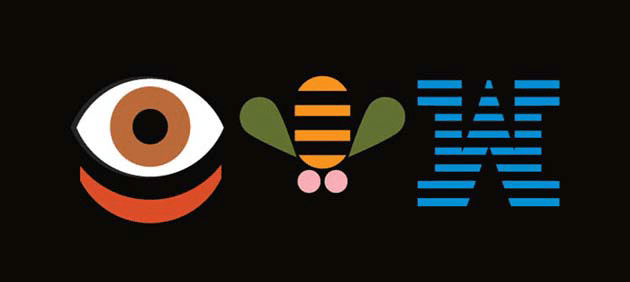





In [1]:
# Import all necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
#warnings.filterwarnings("ignore")
#Use this if you only want to disable future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Read the dataset into a pandas dataframe

df_analyze=pd.read_csv("IBM.csv")


Data Dictionary (pre-cleaning)

- Age: Age of employee
- Attrition: Employee attrition status
- Department: Department of work
- DistanceFromHome
- Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;
- EducationField
- EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
- JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
- MaritalStatus
- MonthlyIncome
- NumCompaniesWorked: Number of companies worked prior to IBM
- WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;
- YearsAtCompany: Current years of service in IBM


## Exploratory Data Analysis


### Assumptions before Data Analysis

1. Younger people have a higher attrition rate
2. People with lower Job Satisfactory have a higher attrition rate
3. People with lower Environment Satisfactory have a higher attrition rate
4. People who are Single have a higher attrition rate
5. One factor contributing to attrition is a lower monthly income


In [3]:
# View randomly rows from the dataset to get a gist of the info

df_analyze.sample(5)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1440,36,No,Research & Development,4,2,Life Sciences,4,2,Divorced,5131,7,3,4
607,49,Yes,Sales,11,3,Marketing,3,4,Married,7654,1,4,9
1184,54,No,Research & Development,22,5,Medical,2,3,Married,17426,3,3,10
713,45,No,Research & Development,1,4,Medical,4,4,Divorced,2270,3,3,5
525,24,Yes,Sales,3,2,Life Sciences,1,3,Single,4577,9,3,2


In [4]:
# Print the no. of rows and columns of the dataset

df_analyze.shape

(1470, 13)

In [5]:
# Print the size of the dataset

print(df_analyze.size)

19110


In [6]:
# Print the columns in the dataset

list(df_analyze.columns)

['Age',
 'Attrition',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'WorkLifeBalance',
 'YearsAtCompany']

In [7]:
# Print the last 5 rows of the dataset
df_analyze.tail()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9
1469,34,No,Research & Development,8,3,Medical,2,3,Married,4404,2,4,4


In [8]:
# Print the data types of the dataset
# Binary encoding can be done on features like attrition 

print(df_analyze.dtypes)

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object


In [9]:
# Print the dataset info
# Shows that there are no missing values in any of the rows

print(df_analyze.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB
None


In [10]:
# check for unique values in each column. This is especially useful for categorical data

df_analyze.nunique()

Age                          43
Attrition                     2
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EnvironmentSatisfaction       4
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
WorkLifeBalance               4
YearsAtCompany               37
dtype: int64

In [11]:
# Find out the min. and max age in the Dataframe which can aid me for the future parts
age_range = df_analyze['Age'].describe()

print("Age Range:")
print(age_range[['min', 'max']])


Age Range:
min    18.0
max    60.0
Name: Age, dtype: float64


In [12]:
# Perform the same thing for distance from home
distancefrmhome_range = df_analyze['DistanceFromHome'].describe()

print("DistanceFromHome Range:")
print(distancefrmhome_range[['min', 'max']])


DistanceFromHome Range:
min     1.0
max    29.0
Name: DistanceFromHome, dtype: float64


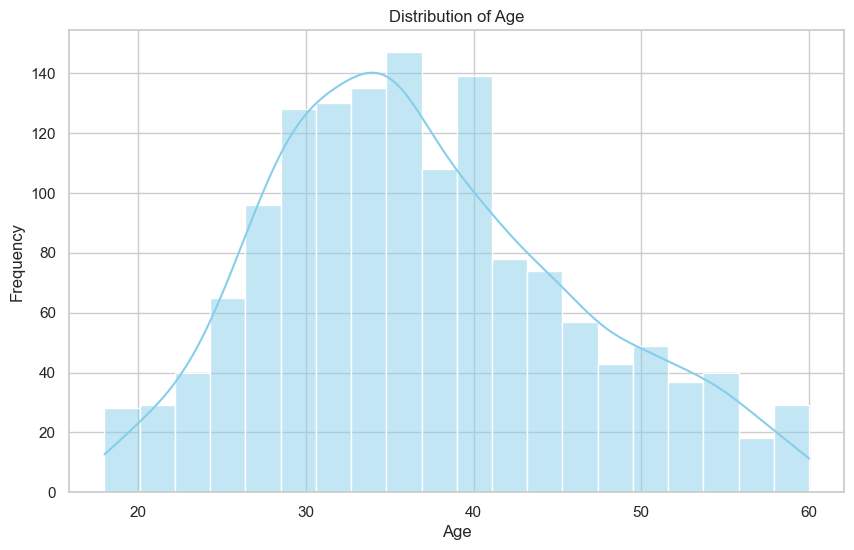

In [13]:
# Create a histogram to further visualize the age distribution

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the histogram
sns.histplot(data=df_analyze, x="Age", bins=20, kde=True, color="skyblue")

# Add labels and a title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")

# Show the plot
plt.show()

## Analyse correlation between age and attrition rate

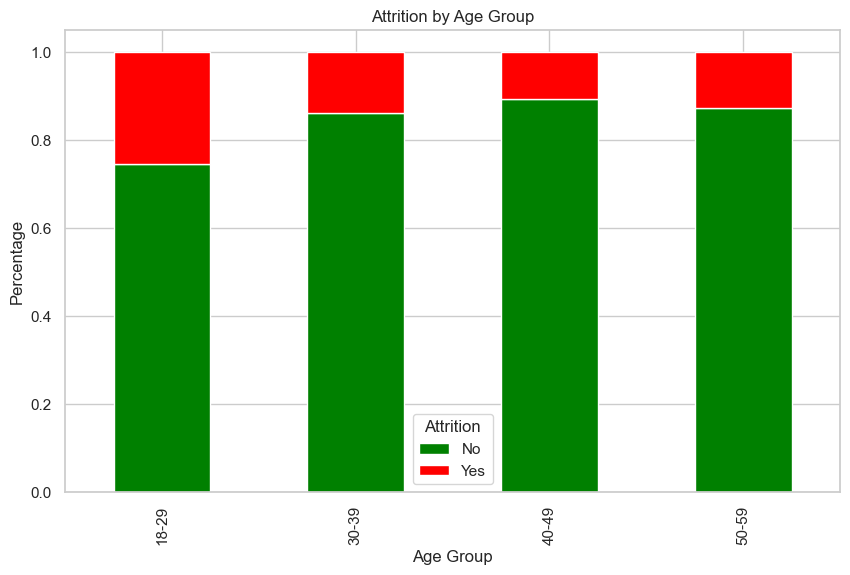

In [14]:
# Create a new column for age groups 
age_bins = [18, 30, 40, 50, 60]
age_labels = ['18-29', '30-39', '40-49', '50-59']
df_analyze['AgeGroup'] = pd.cut(df_analyze['Age'], bins=age_bins, labels=age_labels)

# Calculate attrition percentages within each age group
attrition_by_age = df_analyze.groupby('AgeGroup')['Attrition'].value_counts(normalize=True).unstack()
attrition_by_age = attrition_by_age.fillna(0)

# Create a stacked bar chart
attrition_by_age.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("Attrition by Age Group")
plt.legend(title="Attrition", labels=["No", "Yes"])

plt.show()

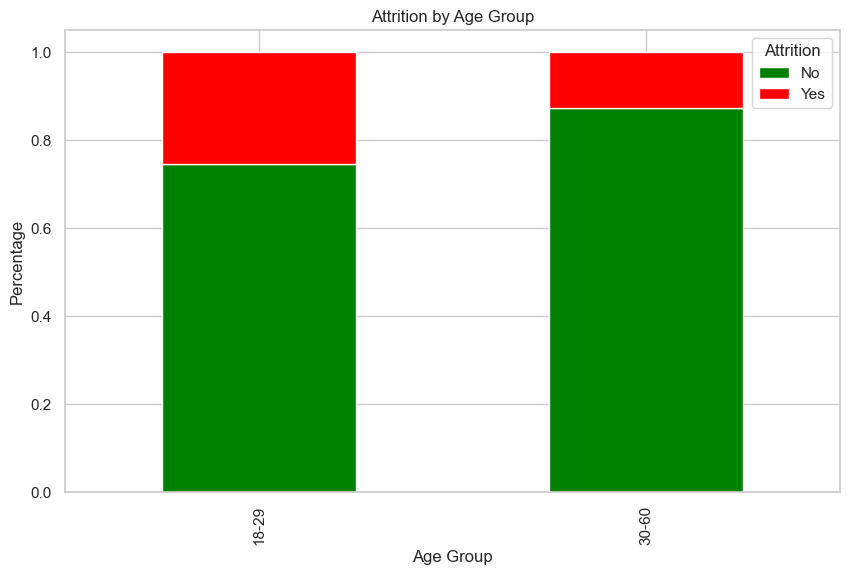

In [15]:
# Create a new column for age groups 
age_bins = [18, 30, 61]
age_labels = ['18-29', '30-60']
df_analyze['AgeGroup'] = pd.cut(df_analyze['Age'], bins=age_bins, labels=age_labels)

# Calculate attrition percentages within each age group
attrition_by_age = df_analyze.groupby('AgeGroup')['Attrition'].value_counts(normalize=True).unstack()
attrition_by_age = attrition_by_age.fillna(0)

# Create a stacked bar chart
attrition_by_age.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("Attrition by Age Group")
plt.legend(title="Attrition", labels=["No", "Yes"])

plt.show()

<font color=blue>__From this, we can see that those of the youngest age group (18-29) are more likely to leave. This could be due to job hopping becoming more popular amongst younger people__</font>

## Analyse correlation between job satisfaction and attrition rate

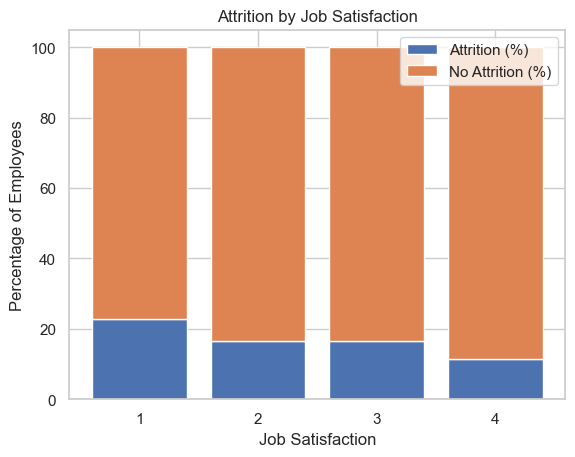

In [16]:
# Count the number of employees with and without attrition for each job satisfaction level
attrition_counts = df_analyze[df_analyze['Attrition'] == 'Yes']['JobSatisfaction'].value_counts().sort_index()
no_attrition_counts = df_analyze[df_analyze['Attrition'] == 'No']['JobSatisfaction'].value_counts().sort_index()

# Calculate attrition percentages for each job satisfaction level
total_counts = attrition_counts + no_attrition_counts
attrition_percentage = (attrition_counts / total_counts) * 100
no_attrition_percentage = (no_attrition_counts / total_counts) * 100

# Create a stacked bar chart
fig, ax = plt.subplots()
x = range(len(attrition_percentage))
bar1 = ax.bar(x, attrition_percentage, label='Attrition (%)')
bar2 = ax.bar(x, no_attrition_percentage, bottom=attrition_percentage, label='No Attrition (%)')

# Set labels, title, and legend
ax.set_xlabel('Job Satisfaction')
ax.set_ylabel('Percentage of Employees')
ax.set_title('Attrition by Job Satisfaction')
ax.set_xticks(x)
ax.set_xticklabels(attrition_percentage.index)
ax.legend()

plt.show()


<font color=blue>__From this, we can see that Job Satisfaction plays a minor role in affecting the attriiton rate. Those of a lower job satisfaction rate seem to have a higher attrition rate__</font>

## Analyse correlation between environment satisfaction and attrition rate

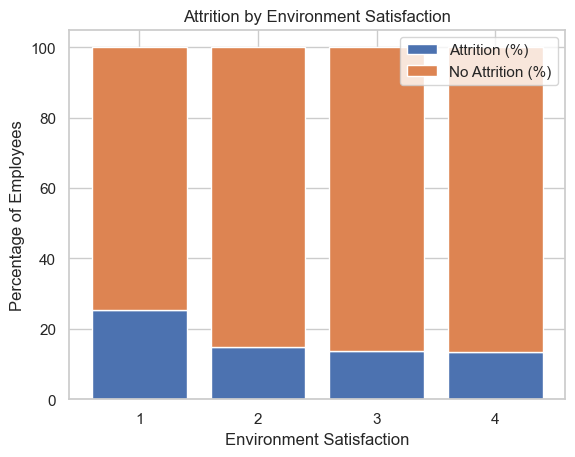

In [17]:
# Count the number of employees with and without attrition for each environment satisfaction level
attrition_counts = df_analyze[df_analyze['Attrition'] == 'Yes']['EnvironmentSatisfaction'].value_counts().sort_index()
no_attrition_counts = df_analyze[df_analyze['Attrition'] == 'No']['EnvironmentSatisfaction'].value_counts().sort_index()

# Calculate attrition percentages for each job satisfaction level
total_counts = attrition_counts + no_attrition_counts
attrition_percentage = (attrition_counts / total_counts) * 100
no_attrition_percentage = (no_attrition_counts / total_counts) * 100

# Create a stacked bar chart
fig, ax = plt.subplots()
x = range(len(attrition_percentage))
bar1 = ax.bar(x, attrition_percentage, label='Attrition (%)')
bar2 = ax.bar(x, no_attrition_percentage, bottom=attrition_percentage, label='No Attrition (%)')

# Set labels, title, and legend
ax.set_xlabel('Environment Satisfaction')
ax.set_ylabel('Percentage of Employees')
ax.set_title('Attrition by Environment Satisfaction')
ax.set_xticks(x)
ax.set_xticklabels(attrition_percentage.index)
ax.legend()

plt.show()


## Analyse correlation between work life balance level and attrition rate

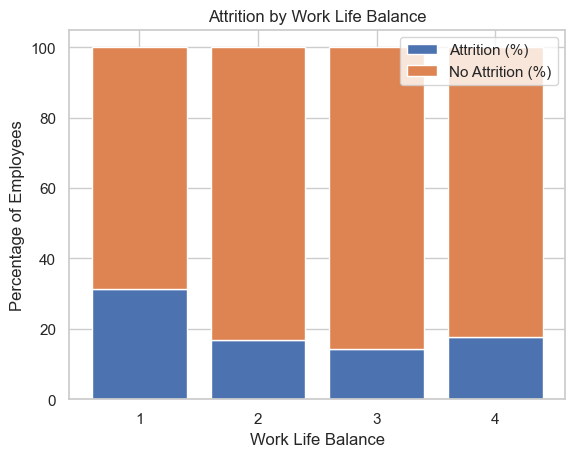

In [18]:
# Count the number of employees with and without attrition for each work life balance level
attrition_counts = df_analyze[df_analyze['Attrition'] == 'Yes']['WorkLifeBalance'].value_counts().sort_index()
no_attrition_counts = df_analyze[df_analyze['Attrition'] == 'No']['WorkLifeBalance'].value_counts().sort_index()

# Calculate attrition percentages for each job satisfaction level
total_counts = attrition_counts + no_attrition_counts
attrition_percentage = (attrition_counts / total_counts) * 100
no_attrition_percentage = (no_attrition_counts / total_counts) * 100

# Create a stacked bar chart
fig, ax = plt.subplots()
x = range(len(attrition_percentage))
bar1 = ax.bar(x, attrition_percentage, label='Attrition (%)')
bar2 = ax.bar(x, no_attrition_percentage, bottom=attrition_percentage, label='No Attrition (%)')

# Set labels, title, and legend
ax.set_xlabel('Work Life Balance')
ax.set_ylabel('Percentage of Employees')
ax.set_title('Attrition by Work Life Balance')
ax.set_xticks(x)
ax.set_xticklabels(attrition_percentage.index)
ax.legend()

plt.show()


<font color=blue>__From this, we can see that those employees with the Work Life Balance level of 1 have an increased attrition rate.__</font>

## Analyse correlation between Education Level and attrition rate

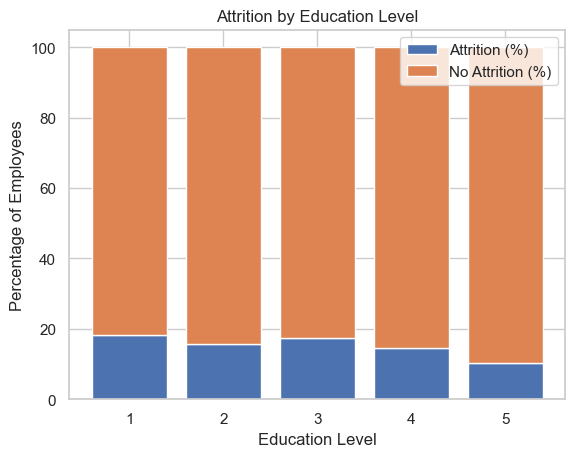

In [19]:
# Count the number of employees with and without attrition for each education level
attrition_counts = df_analyze[df_analyze['Attrition'] == 'Yes']['Education'].value_counts().sort_index()
no_attrition_counts = df_analyze[df_analyze['Attrition'] == 'No']['Education'].value_counts().sort_index()

# Calculate attrition percentages for each education level
total_counts = attrition_counts + no_attrition_counts
attrition_percentage = (attrition_counts / total_counts) * 100
no_attrition_percentage = (no_attrition_counts / total_counts) * 100

# Create a stacked bar chart
fig, ax = plt.subplots()
x = range(len(attrition_percentage))
bar1 = ax.bar(x, attrition_percentage, label='Attrition (%)')
bar2 = ax.bar(x, no_attrition_percentage, bottom=attrition_percentage, label='No Attrition (%)')

# Set labels, title, and legend
ax.set_xlabel('Education Level')
ax.set_ylabel('Percentage of Employees')
ax.set_title('Attrition by Education Level')
ax.set_xticks(x)
ax.set_xticklabels(attrition_percentage.index)
ax.legend()

plt.show()


<font color=blue>__From this, we can see that education level does not really affect the attrition level.__</font>

## Analyse correlation between distance from home and attrition rate

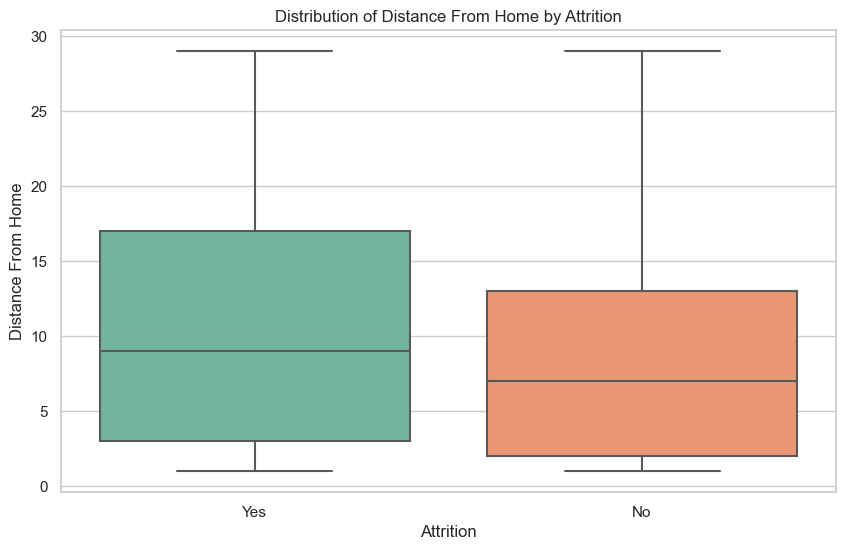

In [20]:
# Create a box plot
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df_analyze, palette='Set2')

# Set labels and title
plt.xlabel('Attrition')
plt.ylabel('Distance From Home')
plt.title('Distribution of Distance From Home by Attrition')

plt.show()


<font color=blue>__From this, we can see that the distance from home has a slight affect on attrition rate. This might be attributed to the fact that the employees dislike travelling too far for work__</font>

## Income correlation with attrition

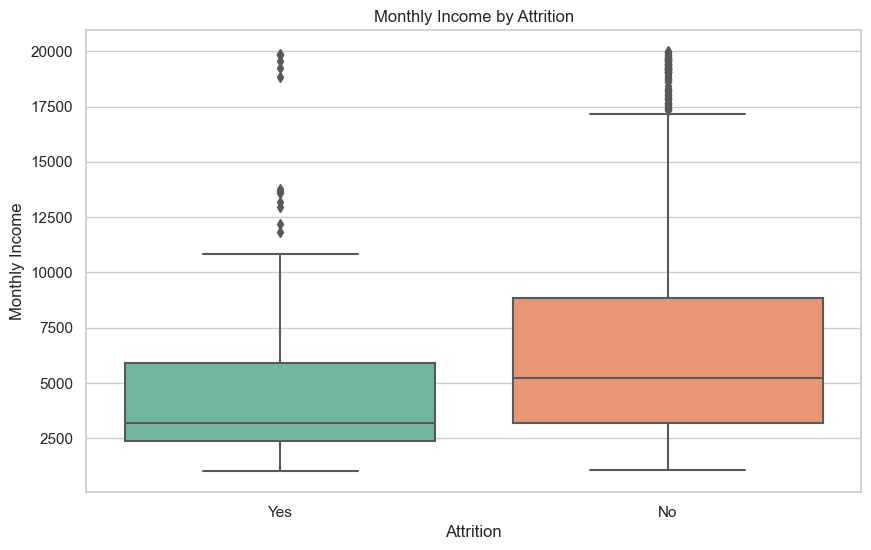

In [21]:
# Create a box plot to visualize monthly income by attrition
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_analyze, x='Attrition', y='MonthlyIncome', palette='Set2')

# Set labels and title
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.title('Monthly Income by Attrition')

plt.show()


<font color=blue>__From this, we can see that income plays quite a big part in attrition rate, with those of a lower income being more likely to leave.__</font>

## Number of companies worked + age group correlation with attrition

__This heatmap explores how attrition connects with the number of jobs employees had before joining the current company. We want to find out if more job changes lead to higher attrition. Keep in mind that older employees may have had more jobs in the past, so age matters too. The heatmap helps us see the combined effect of job changes and age on attrition.__

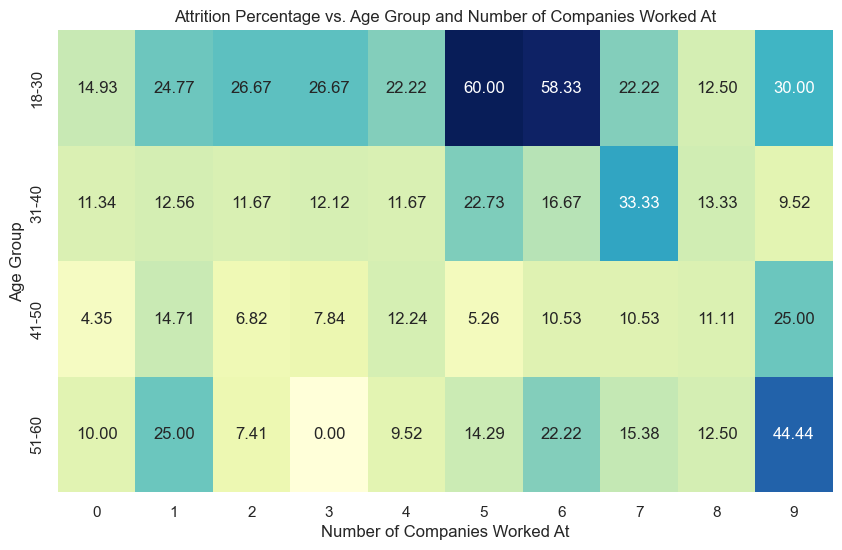

In [22]:
# Create age bins
age_bins = [18, 30, 40, 50, 60]  # Define age groups as needed
age_labels = ['18-30', '31-40', '41-50', '51-60']

# Convert 'Attrition' to binary (1 for 'Yes' and 0 for 'No')
df_analyze['AttritionBinary'] = df_analyze['Attrition'].map({'Yes': 1, 'No': 0})

# Group employees into age categories
df_analyze['AgeGroup'] = pd.cut(df_analyze['Age'], bins=age_bins, labels=age_labels)

# Create a pivot table to calculate the percentage of attrition in each age group
pivot_table = df_analyze.pivot_table(index='AgeGroup', columns='NumCompaniesWorked', values='AttritionBinary', aggfunc='mean')

# Create a heatmap to visualize the percentages
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table * 100, cmap='YlGnBu', annot=True, fmt='.2f', cbar=False)
plt.title('Attrition Percentage vs. Age Group and Number of Companies Worked At')
plt.xlabel('Number of Companies Worked At')
plt.ylabel('Age Group')
plt.show()

<font color=blue>__From this, we can see that while those aged 18-30 and have worked at 5-6 companies have a much higher attrition percentage, the patterns for the other pairings are too inconsistent to reach a conclusion.__</font>

## Marital Status correlation with attrition

<Figure size 800x600 with 0 Axes>

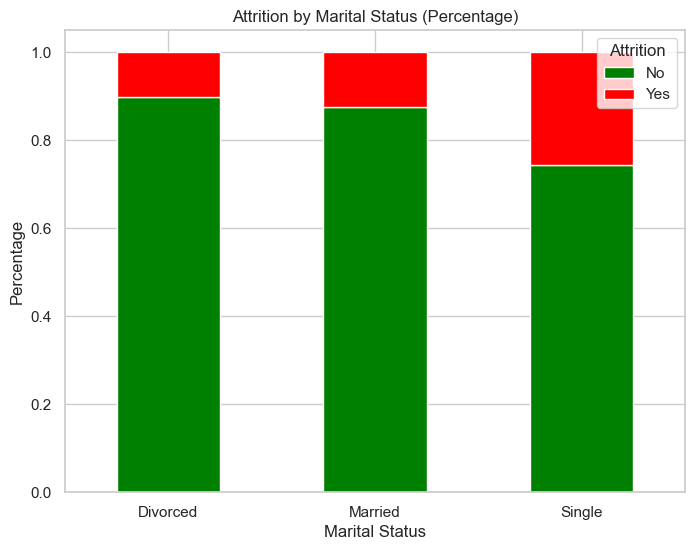

In [23]:
# Calculate the percentage of attrition within each marital status group
attrition_by_marital = df_analyze.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).unstack()
attrition_by_marital = attrition_by_marital.fillna(0)

# Create a stacked bar chart
plt.figure(figsize=(8, 6))
attrition_by_marital.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))
plt.title('Attrition by Marital Status (Percentage)')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Attrition', labels=['No', 'Yes'], loc='upper right')
plt.show()


<font color=blue>__The data indicates that single individuals have a higher attrition rate. This might be because single employees typically have fewer family responsibilities, allowing them to take more career risks and explore new job opportunities.__</font>

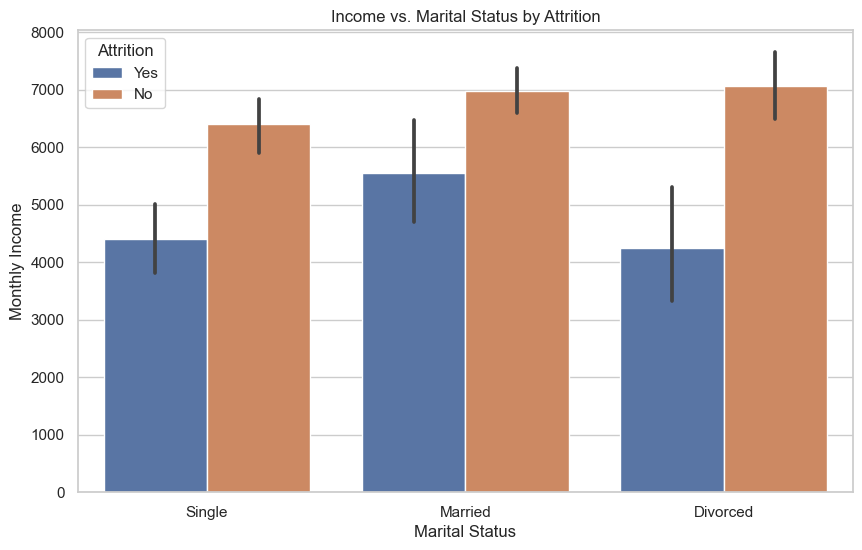

In [24]:
# Create a bar chart to visualize the relationship between income, marital status, and attrition
plt.figure(figsize=(10, 6))
sns.barplot(data=df_analyze, x='MaritalStatus', y='MonthlyIncome', hue='Attrition')
plt.title('Income vs. Marital Status by Attrition')
plt.xlabel('Marital Status')
plt.ylabel('Monthly Income')
plt.legend(title='Attrition')
plt.show()


<font color=blue>__The data indicates that income still plays a part in the attrition rate amongst the different marital statuses__</font>


### Data Analysis conclusions

__After analysis the data and clarifying my assumptions, these are the conclusions I've come up with__

1. Younger employees (18-29) are more likely to leave, possibly due to a tendency for job hopping among this age group.
2. Job satisfaction has a minor role in affecting attrition, with lower job satisfaction associated with higher attrition rates.
3. Employees with an Environment Satisfaction rating of 1 have a significantly higher attrition rate.
4. Distance from home slightly affects the attrition rate, possibly because employees dislike long commutes.
5. Income significantly impacts attrition, with lower-income employees more likely to leave.
6. Among employees aged 18-30 who have worked at 5-6 companies, there is a notably higher attrition percentage, but other age and experience pairings show inconsistent patterns.
7. Single individuals have a higher attrition rate, possibly due to fewer family responsibilities, allowing them to take more career risks.
8. Income still plays a part in attrition across different marital statuses.
9. Employees with the lowest level of Work Life Balance of 1 seem to have a higher attrition rate.



## Data Cleaning


In [25]:
# Reload the dataset
df=pd.read_csv("IBM.csv")


In [26]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [27]:
# Check for duplicates

df[df.duplicated()]

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany


In [28]:
# Check for Null values
# Recall previously we identified some NaN at "country", "director" and "cast" columns

df.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [29]:
# Peform Binary Encoding on the Attrition feature

df['Attrition'] = df['Attrition'].map({'Yes': True, 'No': False})


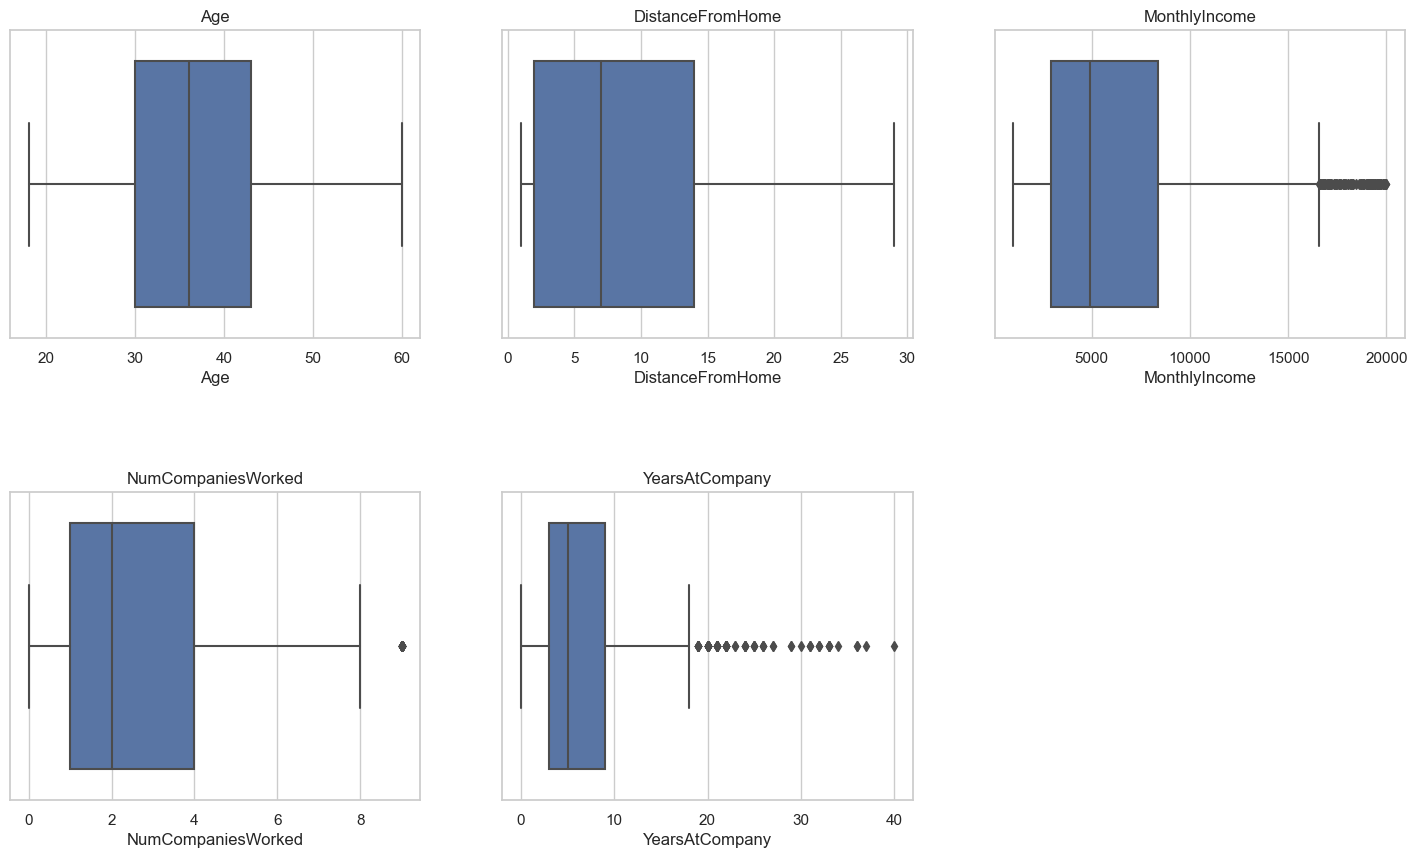

In [30]:
# Visualize outliers

# Create subplots for each numerical column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)

# Box plots for each column
sns.boxplot(x=df['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Age')

sns.boxplot(x=df['DistanceFromHome'], ax=axes[0, 1])
axes[0, 1].set_title('DistanceFromHome')

sns.boxplot(x=df['MonthlyIncome'], ax=axes[0, 2])
axes[0, 2].set_title('MonthlyIncome')

sns.boxplot(x=df['NumCompaniesWorked'], ax=axes[1, 0])
axes[1, 0].set_title('NumCompaniesWorked')

sns.boxplot(x=df['YearsAtCompany'], ax=axes[1, 1])
axes[1, 1].set_title('YearsAtCompany')

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.show()


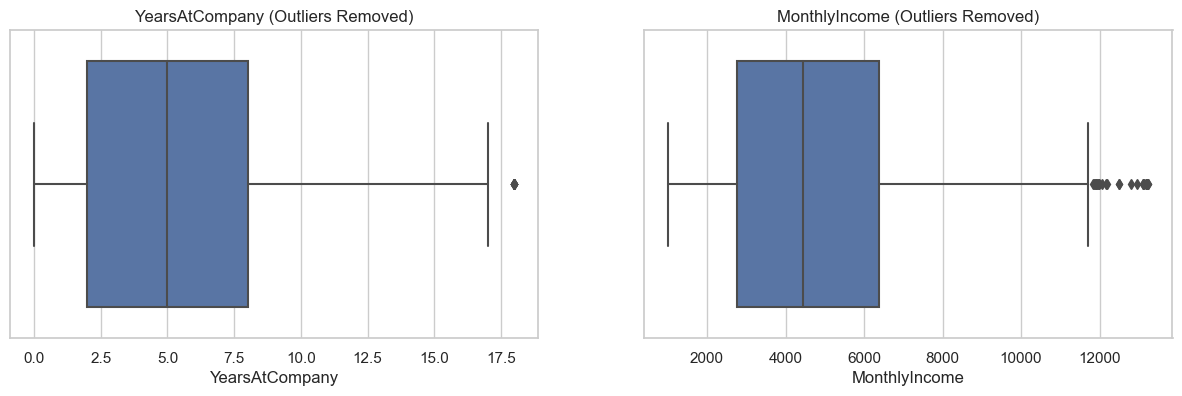

In [31]:
# Calculate IQR for YearsAtCompany
Q1_YearsAtCompany = df['YearsAtCompany'].quantile(0.25)
Q3_YearsAtCompany = df['YearsAtCompany'].quantile(0.75)
IQR_YearsAtCompany = Q3_YearsAtCompany - Q1_YearsAtCompany

# Define upper and lower bounds for outliers
lower_bound_YearsAtCompany = Q1_YearsAtCompany - 1.5 * IQR_YearsAtCompany
upper_bound_YearsAtCompany = Q3_YearsAtCompany + 1.5 * IQR_YearsAtCompany

# Remove outliers for YearsAtCompany
df = df[(df['YearsAtCompany'] >= lower_bound_YearsAtCompany) & (df['YearsAtCompany'] <= upper_bound_YearsAtCompany)]

# Calculate IQR for MonthlyIncome
Q1_MonthlyIncome = df['MonthlyIncome'].quantile(0.25)
Q3_MonthlyIncome = df['MonthlyIncome'].quantile(0.75)
IQR_MonthlyIncome = Q3_MonthlyIncome - Q1_MonthlyIncome

# Define upper and lower bounds for outliers
lower_bound_MonthlyIncome = Q1_MonthlyIncome - 1.5 * IQR_MonthlyIncome
upper_bound_MonthlyIncome = Q3_MonthlyIncome + 1.5 * IQR_MonthlyIncome

# Remove outliers for MonthlyIncome
df = df[(df['MonthlyIncome'] >= lower_bound_MonthlyIncome) & (df['MonthlyIncome'] <= upper_bound_MonthlyIncome)]

# Visualize the boxplots after removing outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

# Box plots for each column
sns.boxplot(x=df['YearsAtCompany'], ax=axes[0, 0])
axes[0, 0].set_title('YearsAtCompany (Outliers Removed)')

sns.boxplot(x=df['MonthlyIncome'], ax=axes[0, 1])
axes[0, 1].set_title('MonthlyIncome (Outliers Removed)')

# Remove empty subplot
fig.delaxes(axes[1, 0])
fig.delaxes(axes[1, 1])

plt.show()


In [32]:
# Find the minimum and maximum values of MonthlyIncome
min_monthly_income = df['MonthlyIncome'].min()
max_monthly_income = df['MonthlyIncome'].max()

# Display the range
print(f"MonthlyIncome Range: {min_monthly_income} to {max_monthly_income}")


MonthlyIncome Range: 1009 to 13247


In [33]:
# Define income categories and labels
bins = [1009, 3000, 7000, 10000, 14000]
labels = [1, 2, 3, 4]

# Create a new column 'IncomeCategory' with the income groups
df['IncomeCategory'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels, include_lowest=True)

# Convert 'IncomeCategory' to integer type
df['IncomeCategory'] = df['IncomeCategory'].astype(int)

# Remove the 'MonthlyIncome' column
df = df.drop('MonthlyIncome', axis=1)

# Display the resulting DataFrame
print(df[['IncomeCategory']])


      IncomeCategory
0                  2
1                  2
2                  1
3                  1
4                  2
...              ...
1465               1
1466               3
1467               2
1468               2
1469               2

[1263 rows x 1 columns]


In [34]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,IncomeCategory
0,41,True,Sales,1,2,Life Sciences,2,4,Single,8,1,6,2
1,49,False,Research & Development,8,1,Life Sciences,3,2,Married,1,3,10,2
2,37,True,Research & Development,2,2,Other,4,3,Single,6,3,0,1
3,33,False,Research & Development,3,4,Life Sciences,4,3,Married,1,3,8,1
4,27,False,Research & Development,2,1,Medical,1,2,Married,9,3,2,2


In [35]:
# Remove the features Education, EducationField, Department, DistanceFromHome, NumCompaniesWorked as they do not contribute much to the affect on Attrition

columns_to_remove = ['Education', 'EducationField', 'Department', 'DistanceFromHome', 'NumCompaniesWorked']
df = df.drop(columns=columns_to_remove)

In [36]:
df.head()

,Age,Attrition,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,WorkLifeBalance,YearsAtCompany,IncomeCategory
0,41,True,2,4,Single,1,6,2
1,49,False,3,2,Married,3,10,2
2,37,True,4,3,Single,3,0,1
3,33,False,4,3,Married,3,8,1
4,27,False,1,2,Married,3,2,2


In [37]:
# Check unique values in the 'Age' column
print(df['Age'].unique())

# Print the 'AgeGroup' column
print(df[['Age']].head())

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 24 21 42 44 39 43 50 26
 46 48 45 55 56 23 51 20 25 19 53 58 40 57 54 52 47 18 60]
   Age
0   41
1   49
2   37
3   33
4   27


In [38]:
# Binning of age as age group patterns may be non-linear
# Define the age bins
age_bins = [18, 30, 40, 50, 60]

# Define the bin labels
age_labels = ['18-30', '31-40', '41-50', '51-60']

# Create a new column 'AgeGroup' with the age group labels
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Perform one-hot encoding on the 'AgeGroup' column
df = pd.get_dummies(df, columns=['AgeGroup'], prefix='AgeGroup')

# Drop the original 'Age' column
df = df.drop(columns=['Age'])

# Display the resulting DataFrame
print(df.columns)


Index(['Attrition', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'WorkLifeBalance', 'YearsAtCompany', 'IncomeCategory',
       'AgeGroup_18-30', 'AgeGroup_31-40', 'AgeGroup_41-50', 'AgeGroup_51-60'],
      dtype='object')


In [39]:
# Display the first few rows of the updated DataFrame
df.head()

,Attrition,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,WorkLifeBalance,YearsAtCompany,IncomeCategory,AgeGroup_18-30,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60
0,True,2,4,Single,1,6,2,False,False,True,False
1,False,3,2,Married,3,10,2,False,False,True,False
2,True,4,3,Single,3,0,1,False,True,False,False
3,False,4,3,Married,3,8,1,False,True,False,False
4,False,1,2,Married,3,2,2,True,False,False,False


In [40]:
# Perform one-hot encoding on the 'MaritalStatus' column
df = pd.get_dummies(df, columns=['MaritalStatus'], prefix='MaritalStatus')

# Display the resulting DataFrame
print(df.head())


   Attrition  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
0       True                        2                4                1   
1      False                        3                2                3   
2       True                        4                3                3   
3      False                        4                3                3   
4      False                        1                2                3   

   YearsAtCompany  IncomeCategory  AgeGroup_18-30  AgeGroup_31-40  \
0               6               2           False           False   
1              10               2           False           False   
2               0               1           False            True   
3               8               1           False            True   
4               2               2            True           False   

   AgeGroup_41-50  AgeGroup_51-60  MaritalStatus_Divorced  \
0            True           False                   False   
1           

In [41]:
# Display the first few rows of the updated DataFrame
df.head()

,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,YearsAtCompany,IncomeCategory,AgeGroup_18-30,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,True,2,4,1,6,2,False,False,True,False,False,False,True
1,False,3,2,3,10,2,False,False,True,False,False,True,False
2,True,4,3,3,0,1,False,True,False,False,False,False,True
3,False,4,3,3,8,1,False,True,False,False,False,True,False
4,False,1,2,3,2,2,True,False,False,False,False,True,False


### Train Test Split 

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

# Calculate the class weights
class_weights = len(y) / (2 * y.value_counts())

# Split the data into training and testing sets (70% train, 30% test)
X_train_base, X_test, y_train_base, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### SMOTE oversampling for True values

<font color=grey>__SMOTE is used to address my class imbalance of Attrition which can help the model be equally trained for both__</font>

In [43]:
# Assuming 'Attrition' is the column of interest in your DataFrame
num_false = df[df['Attrition'] == False].shape[0]
num_true = df[df['Attrition'] == True].shape[0]

print("Number of False Attrition: ", num_false)
print("Number of True Attrition: ", num_true)


Number of False Attrition:  1038
Number of True Attrition:  225


In [44]:
# Perform SMOTE oversampling on the training data
from imblearn.over_sampling import SMOTE

X_train, y_train = SMOTE().fit_resample(X_train_base, y_train_base)

print("Support in the resampled training set:")
print(pd.Series(y_train).value_counts())



Support in the resampled training set:
Attrition
False    731
True     731
Name: count, dtype: int64


In [45]:
# Assuming 'y_train' is the oversampled target variable after applying SMOTE
num_false_smote = y_train[y_train == False].shape[0]
num_true_smote = y_train[y_train == True].shape[0]

print("Number of False Attrition (after SMOTE): ", num_false_smote)
print("Number of True Attrition (after SMOTE): ", num_true_smote)


Number of False Attrition (after SMOTE):  731
Number of True Attrition (after SMOTE):  731


### StandardScaler normalization

<font color=grey>__Standard Scaler is used to transform numerical features by scaling them and ensuring that all features contribute equally to the model and enhancing the convergence speed of certain algorithms sensitive to feature scale.__</font>

In [46]:
from sklearn.preprocessing import StandardScaler

# Identify the numerical columns
numerical_columns = ['EnvironmentSatisfaction', 'JobSatisfaction', 'YearsAtCompany', 'IncomeCategory', 'WorkLifeBalance']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Transform the testing set using the same scaler
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


In [47]:
import joblib

# Save the fitted scaler to a file
joblib.dump(scaler, 'ibm_scaler.pkl')

['ibm_scaler.pkl']

## Model Training and Testing

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.73
              precision    recall  f1-score   support

       False       0.84      0.81      0.83       307
        True       0.31      0.36      0.34        72

    accuracy                           0.73       379
   macro avg       0.58      0.59      0.58       379
weighted avg       0.74      0.73      0.74       379



In [49]:
importance = dt_clf.feature_importances_


In [50]:
feature_indexes_by_importance = importance.argsort()


In [51]:
feature_labels = np.array(df.columns)


In [52]:
# Print each feature label, from least important to most important
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

AgeGroup_41-50 - 1.85%
AgeGroup_31-40 - 3.11%
IncomeCategory - 3.75%
AgeGroup_18-30 - 4.46%
MaritalStatus_Married - 5.87%
MaritalStatus_Divorced - 6.11%
JobSatisfaction - 7.49%
AgeGroup_51-60 - 8.45%
EnvironmentSatisfaction - 13.53%
YearsAtCompany - 13.63%
Attrition - 14.05%
WorkLifeBalance - 17.70%


### Random Forest Classifier Model testing

In [53]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_clf.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report to evaluate model performance
print(classification_report(y_test, y_pred))


Accuracy: 0.78
              precision    recall  f1-score   support

       False       0.85      0.89      0.87       307
        True       0.40      0.32      0.36        72

    accuracy                           0.78       379
   macro avg       0.63      0.60      0.61       379
weighted avg       0.76      0.78      0.77       379



<font color=blue>__This model performed slightly better with having a higher accuracy.__</font>

### Mid modelling thoughts

<font color=green>__While these models have a good f1 score for False values, the True values need to be worked on. Thus, I need to use better algorithms and other methods to balance out precision, recall and the f1 score of True values__</font>


### XGBoost Model Testing using threshold and scaling the weight to attain a higher f1-score for True

In [54]:
import xgboost as xgb

scale_pos_weight = 8

# Initialize the XGBoost classifier with hyperparameters
xgb_clf_two = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds (you can adjust this)
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    max_depth=3,  # Maximum tree depth
    min_child_weight=1,  # Minimum sum of instance weight (Hessian) needed in a child
    gamma=0,  # Minimum loss reduction required to make a further partition on a leaf node
    subsample=1,  # Fraction of training data to randomly sample for growing trees
    colsample_bytree=1,  # Fraction of features to be used for growing trees
    objective='binary:logistic',  # Binary classification objective
    random_state=42,
    scale_pos_weight=scale_pos_weight  # Adjust this value
)

# Fit the model to the training data
xgb_clf_two.fit(X_train, y_train)

# Make predictions on the test data
y_pred_proba = xgb_clf_two.predict_proba(X_test)  # Get class probabilities

# Adjust the classification threshold 
threshold = 0.6
y_pred = (y_pred_proba[:, 1] > threshold).astype(int)  # Classify based on threshold

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(report)


Accuracy: 0.5989445910290238
              precision    recall  f1-score   support

       False       0.88      0.59      0.70       307
        True       0.27      0.65      0.38        72

    accuracy                           0.60       379
   macro avg       0.57      0.62      0.54       379
weighted avg       0.76      0.60      0.64       379



<font color=blue>__This model managed to balance slightly increase recall. However, I can still do some hyperparameter tuning to fit me needs__</font>

### XGB Model Testing again but with Random Search first to find the best parameters

In [55]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform, randint

xgb_clf_three = xgb.XGBClassifier()

# Define a random search space for hyperparameters
param_dist = {
    'n_estimators': randint(100, 1000),  # Random integer between 100 and 1000
    'learning_rate': uniform(0.01, 0.2),  # Random float between 0.01 and 0.21
    'max_depth': randint(3, 6),  # Random integer between 3 and 6
    'min_child_weight': randint(1, 4),  # Random integer between 1 and 4
    'gamma': uniform(0, 0.2),  # Random float between 0 and 0.2
    'subsample': uniform(0.8, 0.2),  # Random float between 0.8 and 1.0
    'colsample_bytree': uniform(0.8, 0.2),  # Random float between 0.8 and 1.0
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_clf_three, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)

# Fit the model to the training data and find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Use the best hyperparameters to create the final model
final_xgb_model = xgb.XGBClassifier(**best_params)

# Fit the final model to the training data
final_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = final_xgb_model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print(report)


Best Hyperparameters: {'colsample_bytree': 0.8465542680860609, 'gamma': 0.01812128690656416, 'learning_rate': 0.13367720186661747, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 230, 'subsample': 0.9719880813472641}
Accuracy: 0.7994722955145118
              precision    recall  f1-score   support

       False       0.86      0.91      0.88       307
        True       0.46      0.35      0.40        72

    accuracy                           0.80       379
   macro avg       0.66      0.63      0.64       379
weighted avg       0.78      0.80      0.79       379



<font color=blue>__This model performed slightly better, having a higher f1-score for the true values, which may be due to the random search finding better parameters.__</font>

### XGB Model Testing again but with Optuna to find the best parameters

In [56]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
import optuna

def objective(trial):
    # Define hyperparameter search space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 4),
        'gamma': trial.suggest_uniform('gamma', 0, 0.2),
        'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
        'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 5, 10),
    }

    # Initialize the XGBoost classifier
    xgb_clf_base = xgb.XGBClassifier(**params)

    # Fit the model to the training data
    xgb_clf_base.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = xgb_clf_base.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return 1.0 - accuracy  # Optuna minimizes, so we use (1 - accuracy) to maximize accuracy

# Create the Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

# Get the best hyperparameters
best_params = study.best_params

# Use the best hyperparameters to create the final model
xgb_clf_opt = xgb.XGBClassifier(**best_params)

# Fit the final model to the training data
xgb_clf_opt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_clf_opt.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print(report)


[I 2023-11-23 11:50:35,734] A new study created in memory with name: no-name-feca1c31-4a8c-400d-9187-18ed16a45866
[I 2023-11-23 11:50:40,140] Trial 0 finished with value: 0.4142480211081794 and parameters: {'n_estimators': 773, 'learning_rate': 0.019069978760096563, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 0.028800817376073942, 'subsample': 0.8601981253698413, 'colsample_bytree': 0.9521451503538944, 'scale_pos_weight': 7.117537691968296}. Best is trial 0 with value: 0.4142480211081794.
[I 2023-11-23 11:50:45,304] Trial 1 finished with value: 0.5092348284960422 and parameters: {'n_estimators': 471, 'learning_rate': 0.011206174498203355, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.05717029276409578, 'subsample': 0.813009991003301, 'colsample_bytree': 0.9133006740486088, 'scale_pos_weight': 9.169814635460998}. Best is trial 0 with value: 0.4142480211081794.
[I 2023-11-23 11:50:48,042] Trial 2 finished with value: 0.24274406332453824 and parameters: {'n_estimators': 721, 'lear

Best Hyperparameters: {'n_estimators': 972, 'learning_rate': 0.07275230409597686, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.09040574028210871, 'subsample': 0.923989978280925, 'colsample_bytree': 0.9960893474380866, 'scale_pos_weight': 6.103697184620974}
Accuracy: 0.7704485488126649
              precision    recall  f1-score   support

       False       0.86      0.86      0.86       307
        True       0.40      0.40      0.40        72

    accuracy                           0.77       379
   macro avg       0.63      0.63      0.63       379
weighted avg       0.77      0.77      0.77       379



In [57]:
importance = xgb_clf_opt.feature_importances_


In [58]:
feature_indexes_by_importance = importance.argsort()


In [59]:
feature_labels = np.array(df.columns)


In [60]:
# Print each feature label, from least important to most important
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

IncomeCategory - 5.15%
JobSatisfaction - 5.65%
EnvironmentSatisfaction - 6.00%
WorkLifeBalance - 6.18%
AgeGroup_18-30 - 6.33%
YearsAtCompany - 6.86%
MaritalStatus_Married - 7.07%
Attrition - 7.73%
AgeGroup_31-40 - 8.87%
AgeGroup_41-50 - 10.28%
MaritalStatus_Divorced - 11.52%
AgeGroup_51-60 - 18.37%


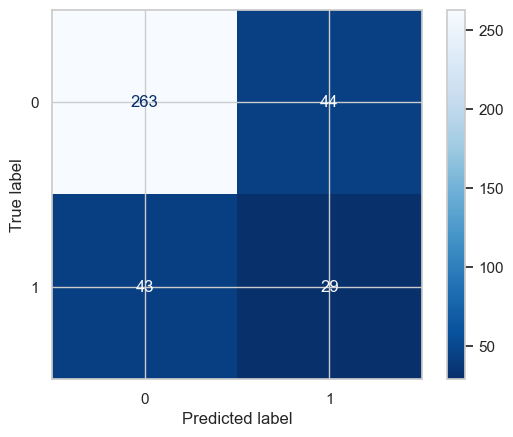

In [61]:
# Create a confusion matrix
cm = metrics.confusion_matrix(y_test, xgb_clf_opt.predict(X_test))

# Plot the confusion matrix
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues_r')

### LightGBM Model Testing with Optuna to find the best parameters

In [78]:
import lightgbm as lgb
import optuna


# Define the LightGBM objective function for Optuna
def objective(trial):
    # Define hyperparameter search space
    params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
    'max_depth': trial.suggest_int('max_depth', 6,10),  # Increase the maximum depth
    'min_child_samples': trial.suggest_int('min_child_samples', 5, 20),  # Increase the minimum child samples
    'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),  # Slightly decrease subsample
    'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),  # Slightly decrease colsample_bytree
    'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 8, 12),
}


    


    # Initialize the LightGBM classifier
    lgb_clf_base = lgb.LGBMClassifier(**params, verbose=-1)

    # Fit the model to the training data
    lgb_clf_base.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_prob = lgb_clf_base.predict_proba(X_test)[:, 1]  
    threshold = 0.8
    y_pred = (y_pred_prob > threshold).astype(bool)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return 1.0 - accuracy  

# Create the Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params

# Use the best hyperparameters to create the final model
lgb_clf_optuna = lgb.LGBMClassifier(random_state = 30, **best_params, verbose=-1)

# Fit the final model to the training data
lgb_clf_optuna.fit(X_train, y_train)

# Make predictions on the test data
y_pred_prob = lgb_clf_optuna.predict_proba(X_test)[:, 1]  # Probability of class 1
threshold = 0.8 # Adjust the threshold as needed
y_pred = (y_pred_prob > threshold).astype(bool)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print(report)

[I 2023-11-23 11:58:48,423] A new study created in memory with name: no-name-d6bd6046-df2a-4302-bccc-c83762e9e979
[I 2023-11-23 11:58:48,505] Trial 0 finished with value: 0.20052770448548818 and parameters: {'learning_rate': 0.013606213434461669, 'max_depth': 8, 'min_child_samples': 15, 'subsample': 0.7600349939276965, 'colsample_bytree': 0.7341330680092442, 'scale_pos_weight': 9.203528530042718}. Best is trial 0 with value: 0.20052770448548818.
[I 2023-11-23 11:58:48,568] Trial 1 finished with value: 0.21899736147757254 and parameters: {'learning_rate': 0.05241882066278713, 'max_depth': 6, 'min_child_samples': 14, 'subsample': 0.8150154260352089, 'colsample_bytree': 0.9895360030118276, 'scale_pos_weight': 8.5696369724304}. Best is trial 0 with value: 0.20052770448548818.
[I 2023-11-23 11:58:48,622] Trial 2 finished with value: 0.26649076517150394 and parameters: {'learning_rate': 0.022447638766730803, 'max_depth': 9, 'min_child_samples': 18, 'subsample': 0.9158212683392366, 'colsample

[I 2023-11-23 11:58:50,642] Trial 25 finished with value: 0.18469656992084438 and parameters: {'learning_rate': 0.011880769896568917, 'max_depth': 6, 'min_child_samples': 19, 'subsample': 0.7607117608943657, 'colsample_bytree': 0.7808939803083268, 'scale_pos_weight': 9.535590050986078}. Best is trial 21 with value: 0.17941952506596304.
[I 2023-11-23 11:58:50,743] Trial 26 finished with value: 0.1820580474934037 and parameters: {'learning_rate': 0.01002289654290548, 'max_depth': 7, 'min_child_samples': 16, 'subsample': 0.8678657958721637, 'colsample_bytree': 0.8146185294001447, 'scale_pos_weight': 9.037747602274294}. Best is trial 21 with value: 0.17941952506596304.
[I 2023-11-23 11:58:50,859] Trial 27 finished with value: 0.2295514511873351 and parameters: {'learning_rate': 0.01842208701545514, 'max_depth': 6, 'min_child_samples': 19, 'subsample': 0.8150655881035321, 'colsample_bytree': 0.7549210205706387, 'scale_pos_weight': 9.367777411065976}. Best is trial 21 with value: 0.179419525

Best Hyperparameters: {'learning_rate': 0.010367075915713047, 'max_depth': 8, 'min_child_samples': 16, 'subsample': 0.8670186698349783, 'colsample_bytree': 0.7896033657529585, 'scale_pos_weight': 9.195389499367279}
Accuracy: 0.8258575197889182
              precision    recall  f1-score   support

       False       0.83      0.98      0.90       307
        True       0.69      0.15      0.25        72

    accuracy                           0.83       379
   macro avg       0.76      0.57      0.58       379
weighted avg       0.80      0.83      0.78       379



### Best hyperparamters discovered from Optuna

After one of my generations from Optuna, I was able to retrieve the best hyperparameters so far as seen below, I also learned random_state affected Optuna results

In [63]:
# Best Hyperparameters: {'learning_rate': 0.010856202924385135, 'max_depth': 8, 'min_child_samples': 6, 'subsample': 0.8379436503526538, 'colsample_bytree': 0.9803024126264913, 'scale_pos_weight': 9.043089391027076}


In [73]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameters
best_params = {'learning_rate': 0.010856202924385135, 
               'max_depth': 8, 
               'min_child_samples': 6, 
               'subsample': 0.8379436503526538,
               'colsample_bytree': 0.9803024126264913, 
               'scale_pos_weight': 9.043089391027076}

# Initialize the LightGBM classifier with the predefined hyperparameters
lgb_clf_predefined = lgb.LGBMClassifier(**best_params, verbose=-1)

# Fit the model to the training data
lgb_clf_predefined.fit(X_train, y_train)

# Make predictions on the test data
y_pred_prob = lgb_clf_predefined.predict_proba(X_test)[:, 1]
threshold = 0.8
y_pred = (y_pred_prob > threshold).astype(bool)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Predefined Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print(report)


Predefined Hyperparameters: {'learning_rate': 0.010856202924385135, 'max_depth': 8, 'min_child_samples': 6, 'subsample': 0.8379436503526538, 'colsample_bytree': 0.9803024126264913, 'scale_pos_weight': 9.043089391027076}
Accuracy: 0.8258575197889182
              precision    recall  f1-score   support

       False       0.85      0.96      0.90       307
        True       0.59      0.26      0.37        72

    accuracy                           0.83       379
   macro avg       0.72      0.61      0.63       379
weighted avg       0.80      0.83      0.80       379



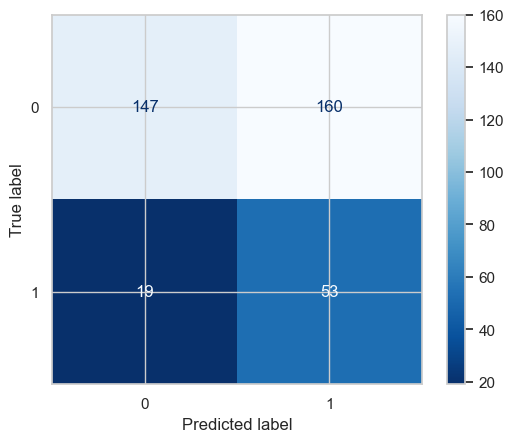

In [65]:
# Create a confusion matrix
cm2 = metrics.confusion_matrix(y_test, lgb_clf_predefined.predict(X_test))

# Plot the confusion matrix
disp = metrics.ConfusionMatrixDisplay(cm2)
disp.plot(cmap='Blues_r')

<font color=blue>__This model in my opinion is the best out of the rest after experimenting as it has an increase in the f1-score for the True values as compared to the first model, without it being at the expense of the False f1 score. It has a decent balance of precision and recall.__</font>

In [66]:
import joblib

joblib.dump(lgb_clf_predefined, 'ibm_lgm_clf_model.pkl')

['ibm_lgm_clf_model.pkl']

In [67]:
print(df)

      Attrition  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
0          True                        2                4                1   
1         False                        3                2                3   
2          True                        4                3                3   
3         False                        4                3                3   
4         False                        1                2                3   
...         ...                      ...              ...              ...   
1465      False                        3                4                3   
1466      False                        4                1                3   
1467      False                        2                2                3   
1468      False                        4                2                2   
1469      False                        2                3                4   

      YearsAtCompany  IncomeCategory  AgeGroup_18-30  AgeGroup_

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1263 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Attrition                1263 non-null   bool 
 1   EnvironmentSatisfaction  1263 non-null   int64
 2   JobSatisfaction          1263 non-null   int64
 3   WorkLifeBalance          1263 non-null   int64
 4   YearsAtCompany           1263 non-null   int64
 5   IncomeCategory           1263 non-null   int32
 6   AgeGroup_18-30           1263 non-null   bool 
 7   AgeGroup_31-40           1263 non-null   bool 
 8   AgeGroup_41-50           1263 non-null   bool 
 9   AgeGroup_51-60           1263 non-null   bool 
 10  MaritalStatus_Divorced   1263 non-null   bool 
 11  MaritalStatus_Married    1263 non-null   bool 
 12  MaritalStatus_Single     1263 non-null   bool 
dtypes: bool(8), int32(1), int64(4)
memory usage: 64.1 KB
